In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
car_data = pd.read_csv('car_dataset.csv')

In [3]:
display(car_data.head())
display(car_data.describe())

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


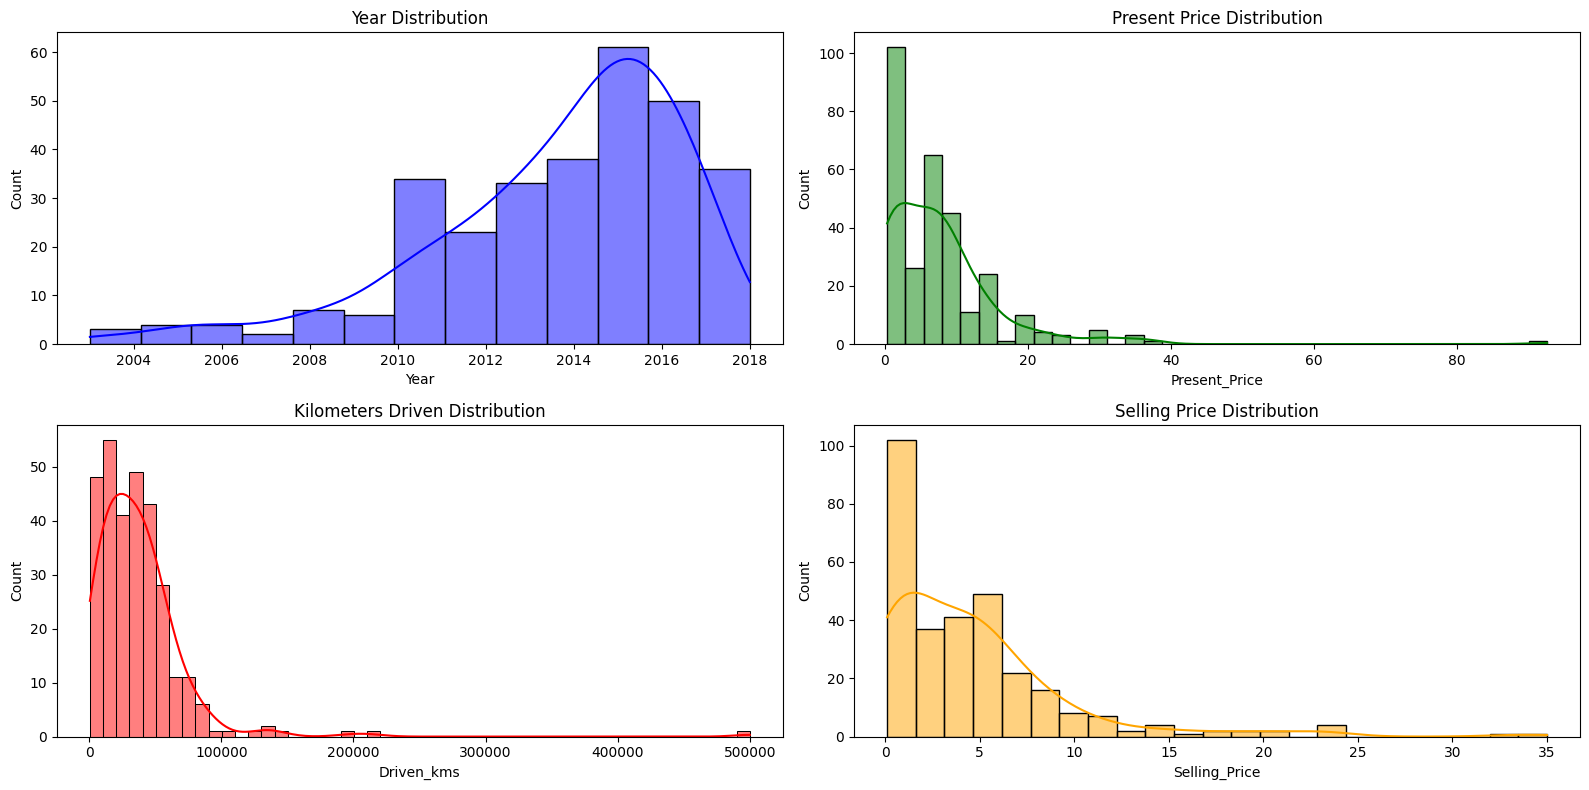

In [4]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.histplot(car_data['Year'], kde=True, color='blue')
plt.title('Year Distribution')

plt.subplot(2, 2, 2)
sns.histplot(car_data['Present_Price'], kde=True, color='green')
plt.title('Present Price Distribution')

plt.subplot(2, 2, 3)
sns.histplot(car_data['Driven_kms'], kde=True, color='red')
plt.title('Kilometers Driven Distribution')

plt.subplot(2, 2, 4)
sns.histplot(car_data['Selling_Price'], kde=True, color='orange')
plt.title('Selling Price Distribution')

plt.tight_layout()
plt.show()

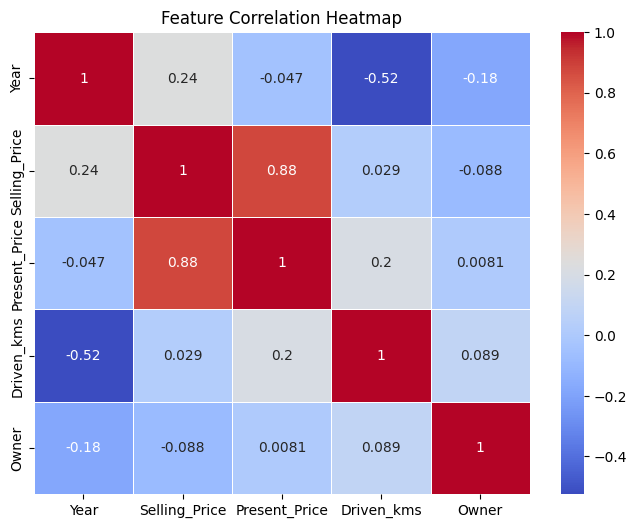

In [5]:
numeric_df = car_data.drop(columns=['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

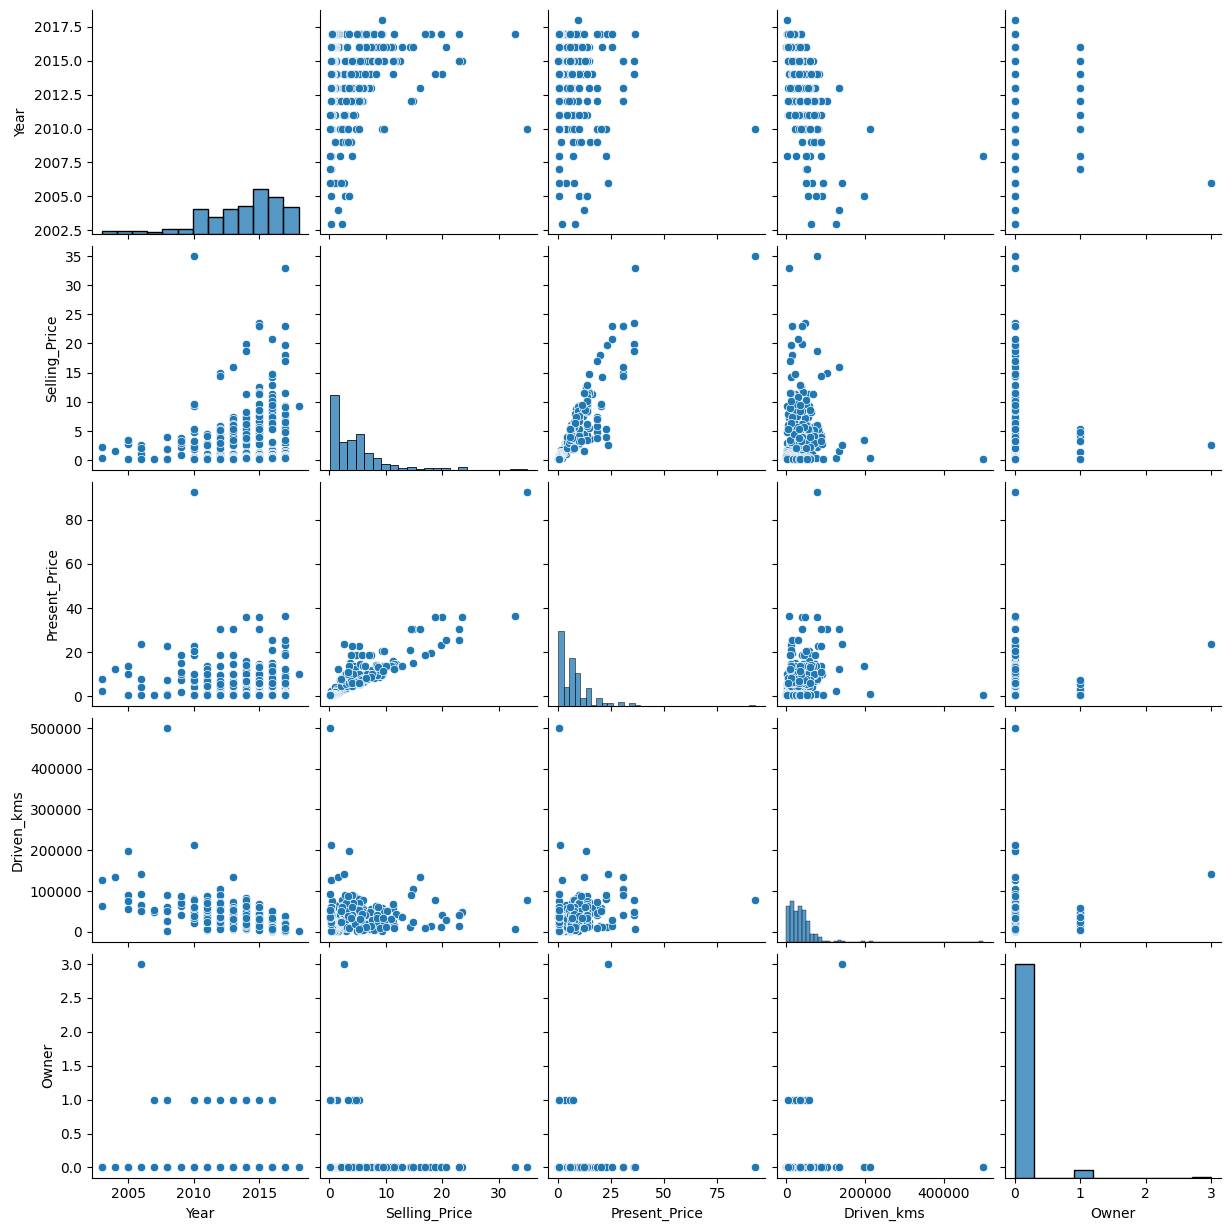

In [6]:
sns.pairplot(numeric_df)
plt.show()

C:\Users\thali\AppData\Local\Temp\ipykernel_13112\1856151274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data, palette="Set3")
C:\Users\thali\AppData\Local\Temp\ipykernel_13112\1856151274.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Selling_type', y='Selling_Price', data=car_data, palette="Set3")
C:\Users\thali\AppData\Local\Temp\ipykernel_13112\1856151274.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Selling_Price', data=car_data, palette="Set3")


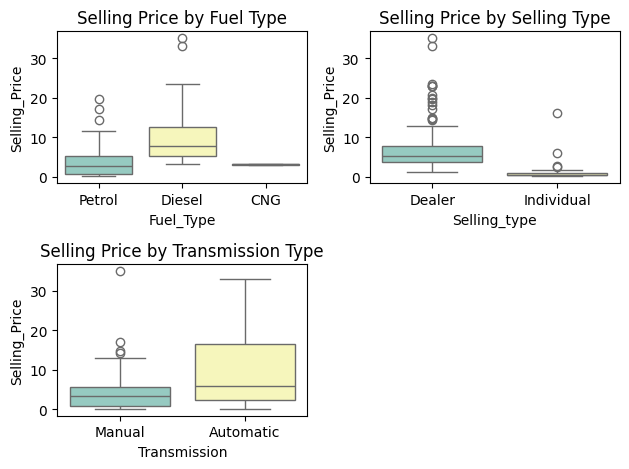

In [7]:
plt.subplot(2, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data, palette="Set3")
plt.title('Selling Price by Fuel Type')

plt.subplot(2, 2, 2)
sns.boxplot(x='Selling_type', y='Selling_Price', data=car_data, palette="Set3")
plt.title('Selling Price by Selling Type')

plt.subplot(2, 2, 3)
sns.boxplot(x='Transmission', y='Selling_Price', data=car_data, palette="Set3")
plt.title('Selling Price by Transmission Type')

plt.tight_layout()
plt.show()

In [8]:
X = pd.concat([car_data[['Year', 'Present_Price', 'Driven_kms', 'Owner']], 
               pd.get_dummies(car_data[['Fuel_Type', 'Selling_type', 'Transmission']], drop_first=True)], axis=1)
y = car_data['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.8209857844262285
R-squared: 0.9643601062650229
